<a href="https://colab.research.google.com/github/hegone/urban-pollution-trends-ml/blob/main/ARIMA_O3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


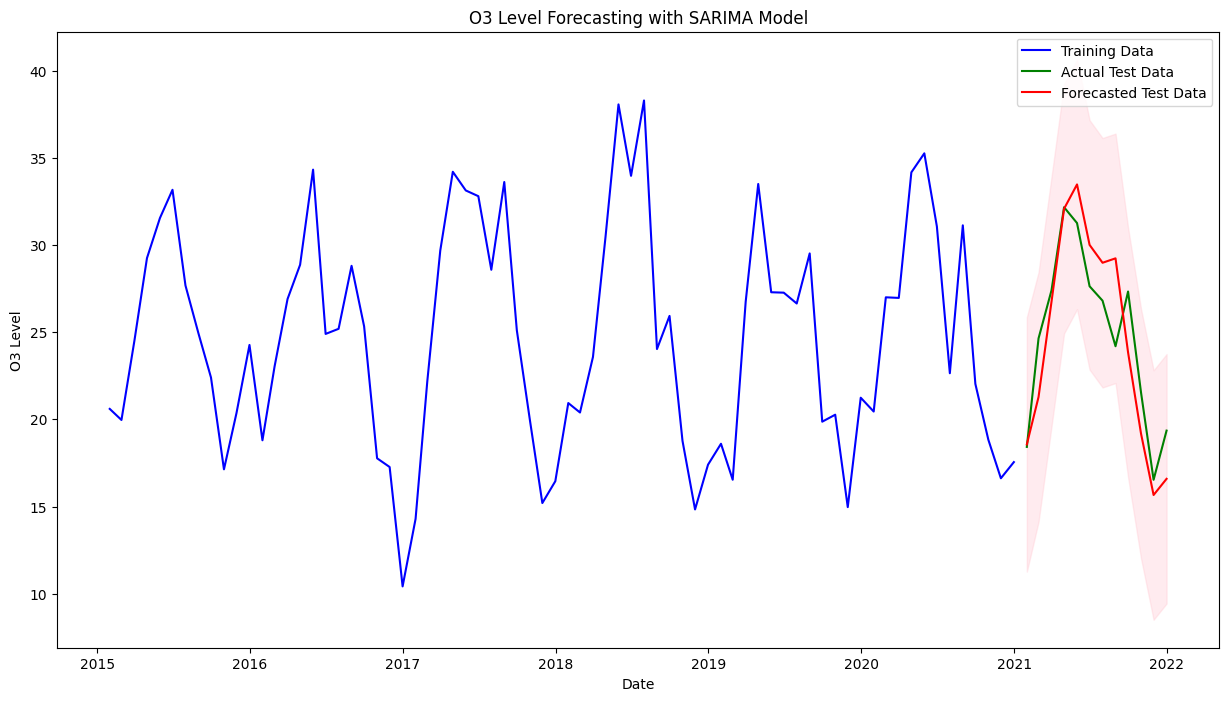

The Root Mean Squared Error of our forecasts is: 2.559610355719058


In [ ]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Load the dataset
file_path = '/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv'
data = pd.read_csv(file_path)

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for O3
data_monthly_o3 = data['o3'].resample('M').mean().dropna()

# Define the training and testing datasets
train_data = data_monthly_o3['2015':'2020']  # Train on data from 2015 to 2020
test_data = data_monthly_o3['2021']  # Test on data from 2021

# Fit the SARIMA model
sarima_model = auto_arima(train_data, seasonal=True, m=12,
                          error_action='ignore', suppress_warnings=True,
                          stepwise=True)

# Fit SARIMAX model
order = sarima_model.order
seasonal_order = sarima_model.seasonal_order
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, forecast_mean))

# Plotting the actual vs predicted values
plt.figure(figsize=(15, 8))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Test Data', color='green')
plt.plot(test_data.index, forecast_mean, label='Forecasted Test Data', color='red')
plt.fill_between(test_data.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('O3 Level Forecasting with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()
plt.show()

# Output the RMSE
print('The Root Mean Squared Error of our forecasts is:', rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


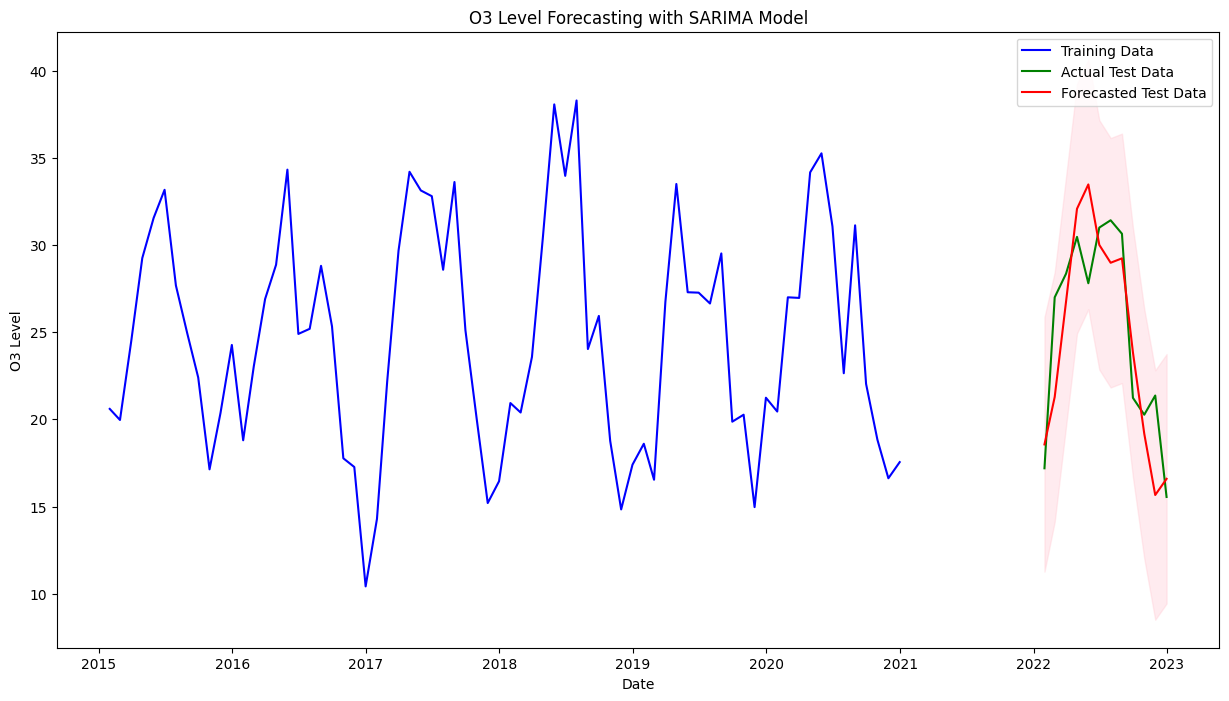

The Root Mean Squared Error of our forecasts is: 3.1936871837308476


In [ ]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Load the dataset
file_path = '/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv'  # replace with adequate file location
data = pd.read_csv(file_path)

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for O3
data_monthly_o3 = data['o3'].resample('M').mean().dropna()

# Define the training and testing datasets
train_data = data_monthly_o3['2015':'2020']  # Train on data from 2015 to 2020
test_data = data_monthly_o3['2022']  # Test on data from 2021

# Fit the SARIMA model
sarima_model = auto_arima(train_data, seasonal=True, m=12,
                          error_action='ignore', suppress_warnings=True,
                          stepwise=True)

# Fit SARIMAX model
order = sarima_model.order
seasonal_order = sarima_model.seasonal_order
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, forecast_mean))

# Plotting the actual vs predicted values
plt.figure(figsize=(15, 8))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Test Data', color='green')
plt.plot(test_data.index, forecast_mean, label='Forecasted Test Data', color='red')
plt.fill_between(test_data.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('O3 Level Forecasting with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()
plt.show()

# Output the RMSE
print('The Root Mean Squared Error of our forecasts is:', rmse)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=777.276, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=709.377, Time=1.85 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=727.875, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1110.300, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=724.161, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=696.619, Time=2.36 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=686.655, Time=2.54 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=685.922, Time=1.51 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=718.457, Time=0.33 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=685.649, Time=2.32 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=714.154, Time=0.84 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=687.697, Time=1.16 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : A

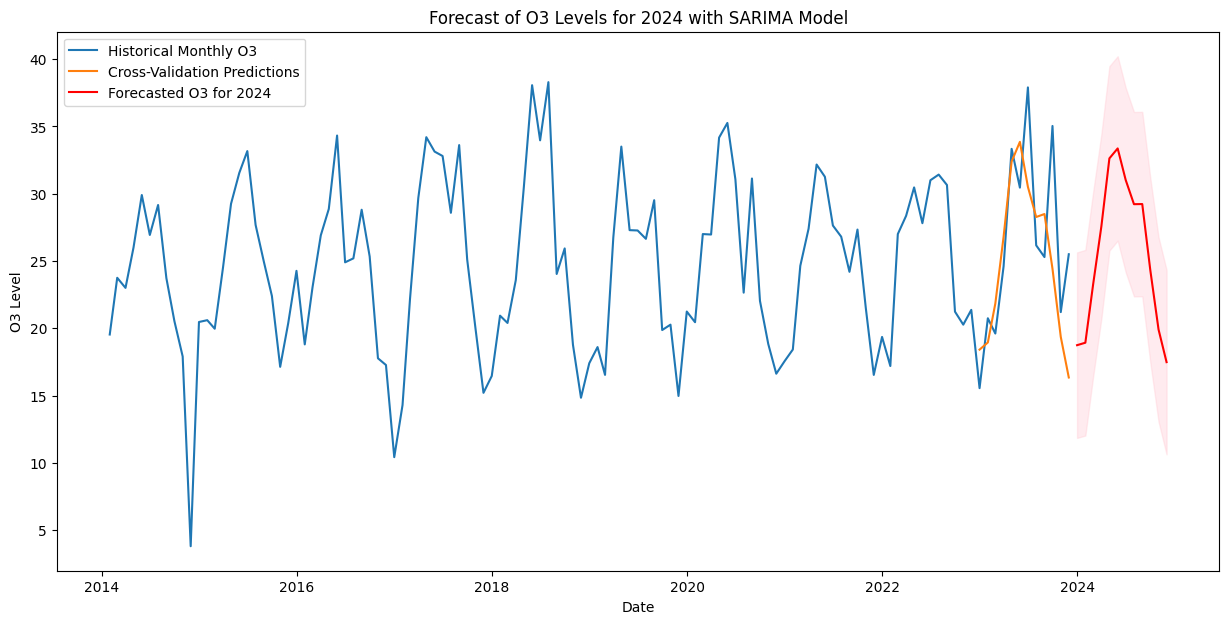

'/content/drive/MyDrive/Air Quality Forecast/London/O3_Forecast_2024_SARIMA.csv'

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
file_path = '/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv'
data = pd.read_csv(file_path)

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for O3
data_monthly_o3 = data['o3'].resample('M').mean()

# Use auto_arima to find the best SARIMA parameters for the O3 data
sarima_model_o3 = auto_arima(data_monthly_o3, seasonal=True, m=12, trace=True,
                             error_action='ignore', suppress_warnings=True)

# Best model summary
print(sarima_model_o3.summary())

# Fit the SARIMA model with the best parameters
best_order = sarima_model_o3.get_params()['order']
best_seasonal_order = sarima_model_o3.get_params()['seasonal_order']
model_o3 = SARIMAX(data_monthly_o3, order=best_order, seasonal_order=best_seasonal_order,
                   enforce_stationarity=False, enforce_invertibility=False)
results_o3 = model_o3.fit()

# Cross-validation
# Set aside the last 12 months of data for cross-validation
train_o3 = data_monthly_o3[:-12]
test_o3 = data_monthly_o3[-12:]

# Fit the model on the training set
model_cv_o3 = SARIMAX(train_o3, order=best_order, seasonal_order=best_seasonal_order,
                      enforce_stationarity=False, enforce_invertibility=False)
results_cv_o3 = model_cv_o3.fit()

# Get predictions starting from the date of the first test set observation
predictions_o3 = results_cv_o3.get_prediction(start=test_o3.index[0], end=test_o3.index[-1], dynamic=False)
predictions_mean_o3 = predictions_o3.predicted_mean

# Calculate RMSE
rmse_o3 = sqrt(mean_squared_error(test_o3, predictions_mean_o3))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse_o3, 2)))

# Forecast for the next 12 months (2024)
forecast_o3 = results_o3.get_forecast(steps=12)
forecast_index_o3 = pd.date_range(start=data_monthly_o3.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_mean_o3 = forecast_o3.predicted_mean
forecast_conf_int_o3 = forecast_o3.conf_int()

# Plot the historical data, cross-validation predictions, and the forecast with confidence intervals
plt.figure(figsize=(15, 7))
plt.plot(data_monthly_o3, label='Historical Monthly O3')
plt.plot(test_o3.index, predictions_mean_o3, label='Cross-Validation Predictions')
plt.plot(forecast_index_o3, forecast_mean_o3, color='red', label='Forecasted O3 for 2024')
plt.fill_between(forecast_index_o3,
                 forecast_conf_int_o3.iloc[:, 0],
                 forecast_conf_int_o3.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Forecast of O3 Levels for 2024 with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()
plt.show()

# Save the forecast data to a CSV file
forecast_output_o3 = pd.DataFrame({'Forecast': forecast_mean_o3,
                                   'Lower CI': forecast_conf_int_o3.iloc[:, 0],
                                   'Upper CI': forecast_conf_int_o3.iloc[:, 1]},
                                  index=forecast_index_o3)

forecast_output_o3.to_csv('/content/drive/MyDrive/Air Quality Forecast/London/O3_Forecast_2024_SARIMA.csv')
forecast_output_o3_path = '/content/drive/MyDrive/Air Quality Forecast/London/O3_Forecast_2024_SARIMA.csv'

forecast_output_o3_path
